# TuberculosisChest X-ray Classification
#### Shailaja S

### Source

https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

In [1]:
#all imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve


In [2]:
os.listdir("../data")

['Normal',
 'Normal.metadata.xlsx',
 'Tuberculosis',
 'Tuberculosis.metadata.xlsx']

In [3]:
tb_data= "../data/Tuberculosis"
os.listdir(tb_data)[:5]

['Tuberculosis-1.png',
 'Tuberculosis-10.png',
 'Tuberculosis-100.png',
 'Tuberculosis-101.png',
 'Tuberculosis-102.png']

In [4]:
normal_data= "../data/Normal"
os.listdir(normal_data)[:5]

['Normal-1.png',
 'Normal-10.png',
 'Normal-100.png',
 'Normal-1000.png',
 'Normal-1001.png']

In [5]:
#number of images
len(os.listdir(tb_data)),len(os.listdir(normal_data))

(700, 3500)

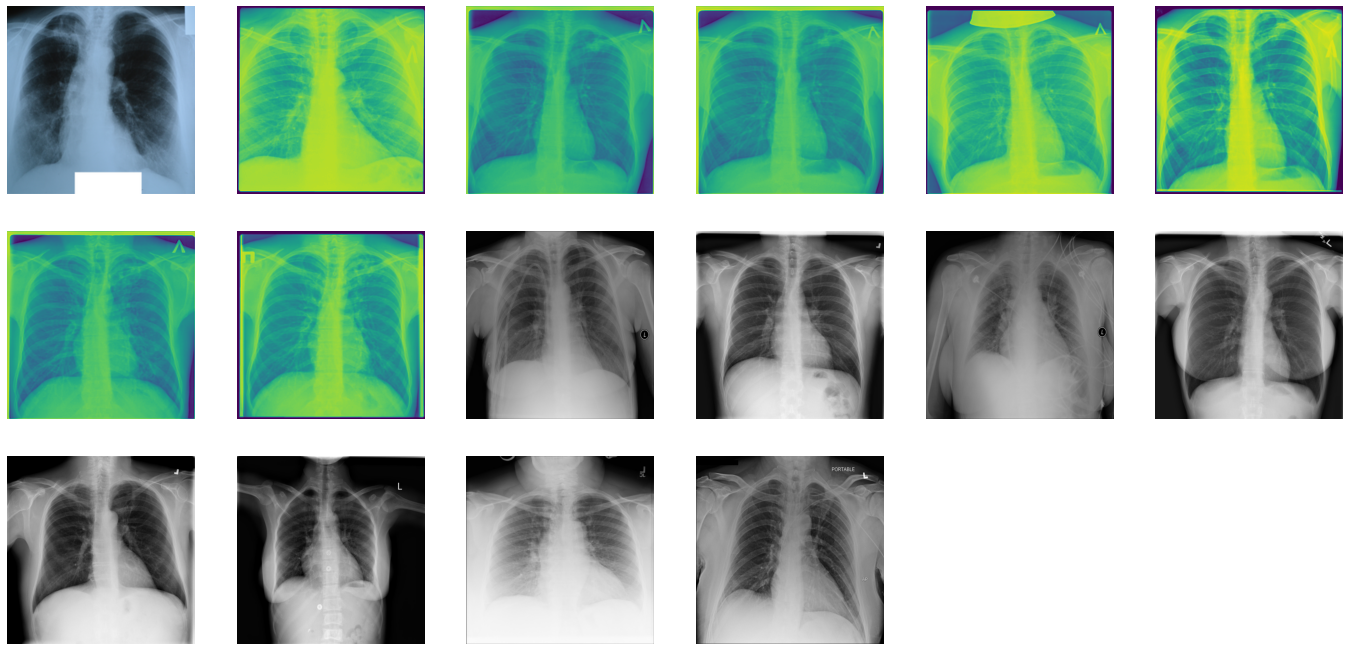

In [6]:
# reading images from tiberculosis and normal directory
import matplotlib.image as mpimg

nrows= 5
ncols= 6
pic_index= 0

fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

tb_img = [os.path.join(tb_data, image) for image in os.listdir(tb_data)[pic_index-8:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[pic_index-8:pic_index]]

for i, image_path in enumerate(tb_img+normal_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

In [7]:
#from tensorflow.keras.models import Model#, load_model
#from tensorflow.keras.layers import BatchNormalization
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D #, Flatten
#from keras.layers import Input,Activation,AveragePooling2D,MaxPooling2D,Dropout,Flatten
#from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# creating training data
X_train_gen= ImageDataGenerator(rescale=1/255, zoom_range=0.2,  width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True,  validation_split = 0.2)

X_train = X_train_gen.flow_from_directory("../Data", 
                                              target_size= (64,64),
                                              class_mode= "binary",
                                              batch_size=32,
                                              subset= "training"
                                              )

Found 3360 images belonging to 2 classes.


In [9]:
# creating validation data
X_test_gen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)

X_test= X_test_gen.flow_from_directory("../data", 
                                              target_size= (64,64),
                                              class_mode= "binary",
                                              batch_size=32,
                                              shuffle= False,
                                              subset= "validation"
                                              )

Found 840 images belonging to 2 classes.


In [10]:
##Model A
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (9, 9), activation='relu',input_shape=(64,64,3))) #secondlayer
model.add(layers.MaxPooling2D((4, 4)))

model.add(layers.Flatten())


model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64)) 
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        165952    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [11]:
his1 = model.fit(X_train, validation_data=X_test, epochs=15)

Epoch 1/15
105/105 [==============================] - 43s 409ms/step - loss: 0.4154 - accuracy: 0.8295 - val_loss: 0.3875 - val_accuracy: 0.8607
Epoch 2/15
105/105 [==============================] - 43s 411ms/step - loss: 0.2819 - accuracy: 0.9101 - val_loss: 0.3650 - val_accuracy: 0.8595
Epoch 3/15
105/105 [==============================] - 43s 410ms/step - loss: 0.3311 - accuracy: 0.8649 - val_loss: 0.3509 - val_accuracy: 0.8595
Epoch 4/15
105/105 [==============================] - 44s 415ms/step - loss: 0.2400 - accuracy: 0.9182 - val_loss: 0.2990 - val_accuracy: 0.8643
Epoch 5/15
105/105 [==============================] - 42s 401ms/step - loss: 0.2070 - accuracy: 0.9211 - val_loss: 0.3094 - val_accuracy: 0.8631
Epoch 6/15
105/105 [==============================] - 47s 445ms/step - loss: 0.1879 - accuracy: 0.9259 - val_loss: 0.2110 - val_accuracy: 0.8762
Epoch 7/15
105/105 [==============================] - 51s 482ms/step - loss: 0.1693 - accuracy: 0.9348 - val_loss: 0.2660 - val_ac

In [12]:
prediction= model.predict(X_test, steps=np.ceil(X_test.samples/X_test.batch_size), verbose=2)
prediction= (prediction > 0.5)

27/27 - 7s - 7s/epoch - 241ms/step


In [13]:
val_labels=X_test.classes

<AxesSubplot:>

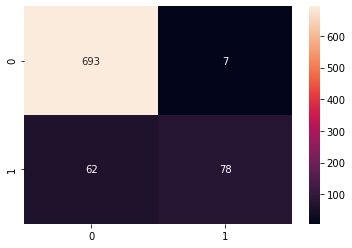

In [14]:
cm = confusion_matrix(val_labels, prediction)
sns.heatmap(cm, annot=True, fmt='g')

In [15]:
accuracy_score(X_test.classes, prediction)

0.9178571428571428

In [16]:
print(classification_report(X_test.classes, prediction))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       700
           1       0.92      0.56      0.69       140

    accuracy                           0.92       840
   macro avg       0.92      0.77      0.82       840
weighted avg       0.92      0.92      0.91       840



In [17]:
print(his1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


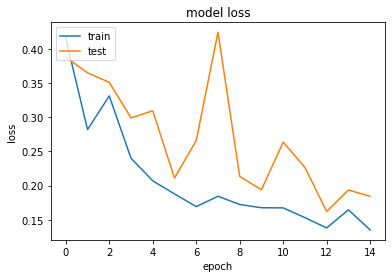

In [18]:
# summarize history for loss
plt.plot(his1.history['loss'])
plt.plot(his1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

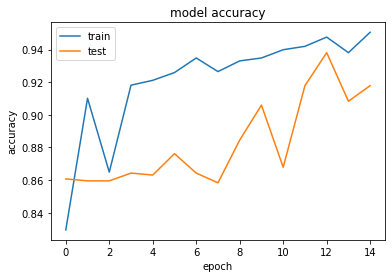

In [19]:
# summarize history for accuracy
plt.plot(his1.history['accuracy'])
plt.plot(his1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

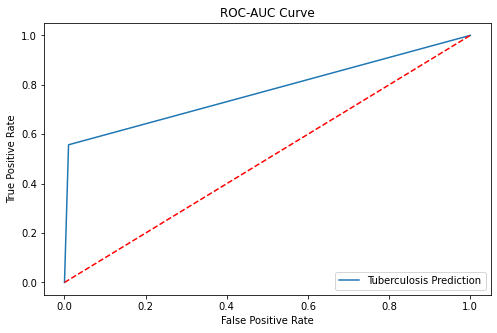

In [20]:
from sklearn.metrics import roc_curve

fpr,tpr,_ = roc_curve(X_test.classes,prediction)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label = 'Tuberculosis Prediction')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc = 4)

In [21]:
##Model B
model = Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (6, 6), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu',padding="same",input_shape=(64,64,3))) #secondlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())


model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64)) 
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 32)          36896     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 32)        

In [22]:
his2 = model.fit(X_train, validation_data=X_test, epochs=15)

Epoch 1/15
105/105 [==============================] - 38s 356ms/step - loss: 0.4718 - accuracy: 0.8274 - val_loss: 0.4310 - val_accuracy: 0.8333
Epoch 2/15
105/105 [==============================] - 39s 371ms/step - loss: 0.3481 - accuracy: 0.8574 - val_loss: 0.3827 - val_accuracy: 0.8643
Epoch 3/15
105/105 [==============================] - 42s 395ms/step - loss: 0.3867 - accuracy: 0.8872 - val_loss: 0.4602 - val_accuracy: 0.8333
Epoch 4/15
105/105 [==============================] - 42s 402ms/step - loss: 0.3098 - accuracy: 0.8872 - val_loss: 0.4015 - val_accuracy: 0.8607
Epoch 5/15
105/105 [==============================] - 36s 343ms/step - loss: 0.2389 - accuracy: 0.9202 - val_loss: 0.2960 - val_accuracy: 0.8643
Epoch 6/15
105/105 [==============================] - 36s 344ms/step - loss: 0.2753 - accuracy: 0.9039 - val_loss: 0.3616 - val_accuracy: 0.8321
Epoch 7/15
105/105 [==============================] - 36s 341ms/step - loss: 0.3208 - accuracy: 0.8571 - val_loss: 0.2848 - val_ac

In [23]:
prediction= model.predict(X_test, steps=np.ceil(X_test.samples/X_test.batch_size), verbose=2)
prediction= (prediction > 0.5)

27/27 - 6s - 6s/epoch - 206ms/step


In [24]:
val_labels=X_test.classes

<AxesSubplot:>

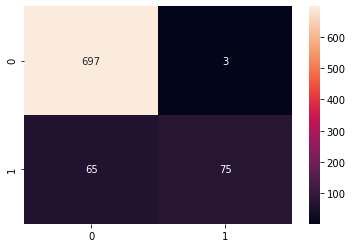

In [25]:
cm = confusion_matrix(X_test.classes, prediction)
sns.heatmap(cm, annot=True, fmt='g')

In [26]:
accuracy_score(X_test.classes, prediction)
print(classification_report(X_test.classes, prediction))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       700
           1       0.96      0.54      0.69       140

    accuracy                           0.92       840
   macro avg       0.94      0.77      0.82       840
weighted avg       0.92      0.92      0.91       840



In [27]:
print(his2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


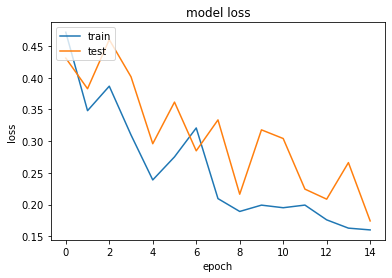

In [28]:
# summarize history for loss
plt.plot(his2.history['loss'])
plt.plot(his2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

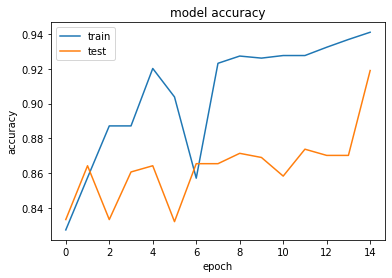

In [29]:
# summarize history for accuracy
plt.plot(his2.history['accuracy'])
plt.plot(his2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

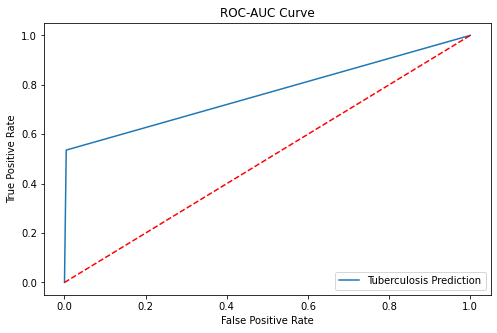

In [30]:
from sklearn.metrics import roc_curve

fpr,tpr,_ = roc_curve(X_test.classes,prediction)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label = 'Tuberculosis Prediction')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc = 4)